In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from huggingface_hub import login
from google.colab import userdata

key = userdata.get('newtoken_0192')
login(key)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Stable Diffusion v1‑5 Pipeline: Enter your prompt for image generation (or type 'exit' to quit):
Stable Diffusion Prompt: A city with grayscale shade


  0%|          | 0/50 [00:00<?, ?it/s]

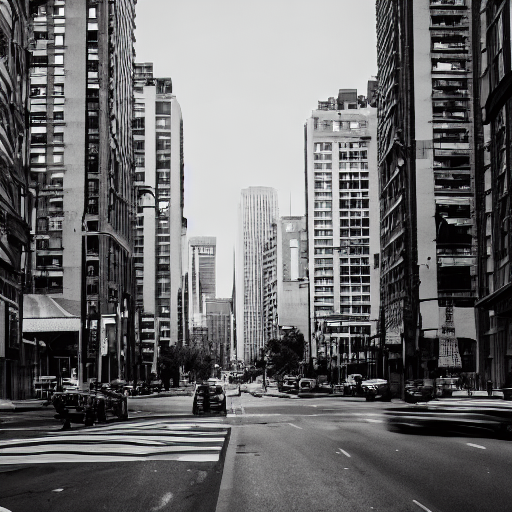

Stable Diffusion Prompt: A person with bunch of balloons in hand


  0%|          | 0/50 [00:00<?, ?it/s]

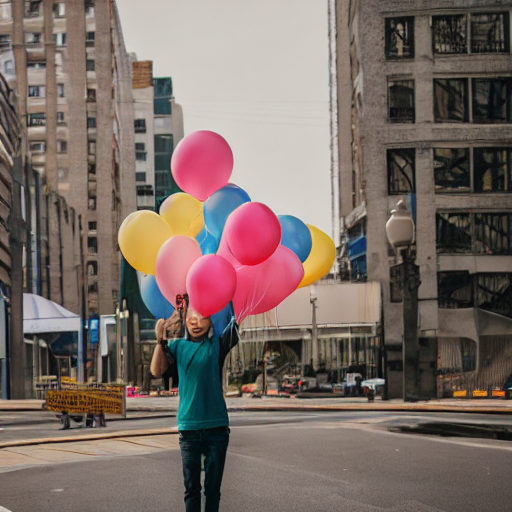

Stable Diffusion Prompt: A rich mansion made of gold and beautiful garden inside it


  0%|          | 0/50 [00:00<?, ?it/s]

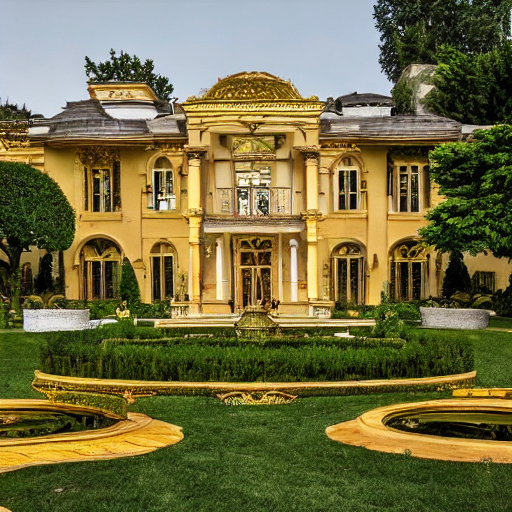

Stable Diffusion Prompt: A batmobile standing in the center with burning buildings on both sides and a dark theme full of night


  0%|          | 0/50 [00:00<?, ?it/s]

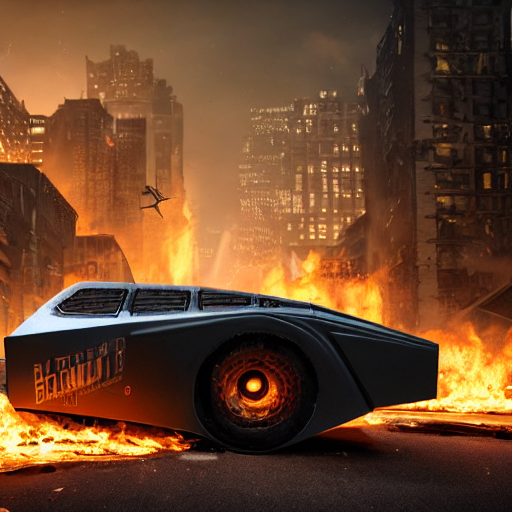

Stable Diffusion Prompt: Exit
Exiting Stable Diffusion chat. Goodbye!


In [1]:
import gc
import torch
from diffusers import PixArtAlphaPipeline, StableDiffusionPipeline
import IPython.display as display

# Clear Python garbage and GPU cache
gc.collect()
torch.cuda.empty_cache()

pipe_sd = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
# Move the Stable Diffusion pipeline to GPU
pipe_sd = pipe_sd.to("cuda")

def chat():
    print("Stable Diffusion v1‑5 Pipeline: Enter your prompt for image generation (or type 'exit' to quit):")
    while True:
        prompt = input("Stable Diffusion Prompt: ")
        if prompt.lower() == "exit":
            print("Exiting Stable Diffusion chat. Goodbye!")
            break

        # Use a GPU generator for stable diffusion
        generator = torch.Generator("cuda").manual_seed(42)

        # Generate an image (here we use a higher resolution and more steps)
        result = pipe_sd(
            prompt=prompt,
            height=512,             # Higher resolution height
            width=512,              # Higher resolution width
            num_inference_steps=50, # Standard number of steps for stable diffusion
            generator=generator,
            num_images_per_prompt=1
        )
        image = result.images[0]
        # Save and display the generated image
        image.save("stable_diffusion_generated.png")
        display.display(image)

chat()